# **Introduction**

This notebook analyzes a dataset related to happiness scores across different countries. The goal is to understand the factors contributing to happiness and build models to classify and predict happiness scores.

## **Data Loading and Preparation:**

- Creates a new column 'happiness_class' by categorizing the 'score' into 'Low', 'Medium', and 'High' classes.

## **Happiness Classification:**

- Splits the data into features (x) and the target variable (y) for classification.
- Uses a pipeline with StandardScaler and RandomForestClassifier to build a classification model.
- Evaluates the classification model using a confusion matrix and classification report.

## **Happiness Score Regression:**

- Splits the data into features (x) and the target variable (y) for regression, using the original 'score' as the target.
- Uses GridSearchCV with RandomForestRegressor to find the best hyperparameters for a regression model.
- Evaluates the regression model using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2).

## **Feature Importance and Prediction:**

- Identifies the most important features for both the classification and regression models.
- Makes a prediction on a new hypothetical country's data using the trained regression model.

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
file = '/content/drive/My Drive/DSA210/combined_data.csv'

df = pd.read_csv(file)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,overall_rank,country_name,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,unemployment_rate
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,7.36
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,3.80
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,5.13
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.70
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,4.71


Happines is splitted by 'High', 'Medium' and 'Low'.
- If the score is less than or equal to 4.8, 'Low'.
- If the score is greater than 4.8 but less than 6.0,  'Medium'.
- If the score is 6.0 or greater, 'High'

In [ ]:
def score_to_label(score):
    if score <= 4.8:
        return 'Low'
    elif score < 6.0:
        return 'Medium'
    else:
        return 'High'

df['happiness_class'] = df['score'].apply(score_to_label)

df['happiness_class'].value_counts()


,count
happiness_class,
Medium,46
Low,45
High,44


In [ ]:
df.head()

,overall_rank,country_name,score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,unemployment_rate,happiness_class
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,7.36,High
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,3.80,High
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,5.13,High
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.70,High
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,4.71,High


In [ ]:
x = df.drop(columns=['overall_rank','score', 'happiness_class', 'country_name'])
y = df['happiness_class']

#Dataset only includes numerical datas.
numerical = x.select_dtypes(include=["int64", "float64"]).columns.tolist()

print(numerical)

['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption', 'unemployment_rate']


# Classification Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',    RandomForestClassifier(
                   n_estimators=400,
                   random_state=42,
                   class_weight='balanced'))
])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, stratify=y, random_state=42)

pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, random_state=42))])

In [ ]:
y_pred = pipeline.predict(x_test)
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

        High      0.778     0.778     0.778         9
         Low      1.000     0.889     0.941         9
      Medium      0.700     0.778     0.737         9

    accuracy                          0.815        27
   macro avg      0.826     0.815     0.819        27
weighted avg      0.826     0.815     0.819        27



Looking at the classification report, the model seems to perform quite well overall, with a good overall accuracy.

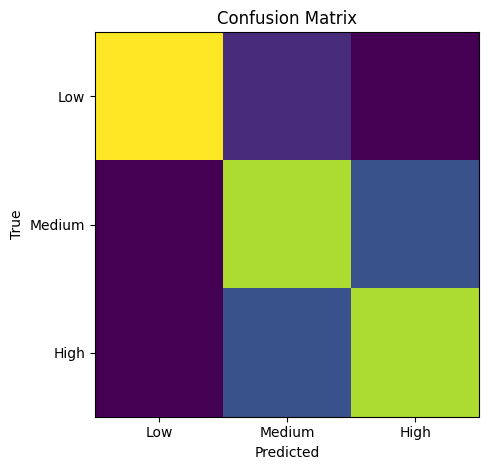

In [ ]:
cm = confusion_matrix(y_test, y_pred,
                      labels=['Low', 'Medium', 'High'])

plt.imshow(cm)
plt.title('Confusion Matrix')
plt.xticks(range(3), ['Low','Medium','High'])
plt.yticks(range(3), ['Low','Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

The confusion matrix visualizes the performance of our classification model. It shows how many instances of each happiness class ('Low', 'Medium', 'High') were correctly and incorrectly classified.

In [ ]:
importances = pipeline.named_steps['clf'].feature_importances_
feat_imp = pd.Series(importances, index=x.columns).sort_values(ascending=False)
print(feat_imp.head(10))

healthy_life_expectancy         0.231281
gdp_per_capita                  0.211098
social_support                  0.196559
freedom_to_make_life_choices    0.106551
perceptions_of_corruption       0.091850
generosity                      0.083706
unemployment_rate               0.078954
dtype: float64


From importance levels, we can understand how our parameters are important for happines. As we see one of the most important things are healthy life expectancy, GDP per capita and social support.

# Regression Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

y = df['score']
x = df.drop(columns=['overall_rank','score', 'happiness_class', 'country_name'], errors='ignore')
y.head()

,score
0,7.632
1,7.594
2,7.555
3,7.495
4,7.487


In [ ]:
x.head()

,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,unemployment_rate
0,1.305,1.592,0.874,0.681,0.202,0.393,7.36
1,1.456,1.582,0.861,0.686,0.286,0.340,3.80
2,1.351,1.590,0.868,0.683,0.284,0.408,5.13
3,1.343,1.644,0.914,0.677,0.353,0.138,2.70
4,1.420,1.549,0.927,0.660,0.256,0.357,4.71


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [ ]:

rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators'     : [200, 400, 800],
    'max_depth'        : [None, 10, 20, 40],
    'min_samples_leaf' : [1, 2, 4]
}

grid = GridSearchCV(
    rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train, y_train)
best_rf = grid.best_estimator_
print('Best parameters:', grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 400}


In [ ]:
y_pred = best_rf.predict(x_test)

mae  = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print('Test Results:')
print(f' MAE  : {mae:.3f}')
print(f' RMSE : {rmse:.3f}')
print(f' R2   : {r2:.3f}')

Test Results:
 MAE  : 0.473
 RMSE : 0.385
 R2   : 0.696



**MAE (Mean Absolute Error)**: 0.473 This indicates that, on average, regression model's predictions are off by about 0.473 units from the actual happiness score. A lower MAE is generally better.


**RMSE (Root Mean Squared Error)**: 0.385 The RMSE is the square root of the average of the squared errors. It penalizes larger errors more heavily than MAE. A lower RMSE is also better.


**R2 (R-squared)**: 0.696 This metric represents the proportion of the variance in the happiness score that is predictable from the features. An R-squared of 0.696 means that your model explains approximately 69.6% of the variability in happiness scores. A higher R-squared is generally better, with 1 being a perfect fit.

In [ ]:
importances = best_rf.feature_importances_
feat_imp = pd.Series(importances, index= x.columns).sort_values(ascending=False)

print('Importance of Our Parameters')
print(feat_imp.head(10))

Importance of Our Parameters
healthy_life_expectancy         0.370152
gdp_per_capita                  0.322101
social_support                  0.163058
perceptions_of_corruption       0.051440
freedom_to_make_life_choices    0.038522
generosity                      0.031499
unemployment_rate               0.023229
dtype: float64


The feature importances show that healthy life expectancy, GDP per capita, and social support are the primary drivers of happiness according to regression model. This aligns with common understanding of factors contributing to well being. This analysis of feature importance is valuable for understanding which factors are most strongly associated with happiness.

# **Final Part**

Now our model is ready to test, let's try it with random parameters.

In [ ]:
test_country = pd.DataFrame({
    'gdp_per_capita' : [1.2],
    'social_support' : [1.1],
    'healthy_life_expectancy' : [0.6],
    'freedom_to_make_life_choices' : [0.4],
    'generosity' : [0.3],
    'perceptions_of_corruption' : [0.4],
    'unemployment_rate' : [6]
})

prediction = best_rf.predict(test_country)
print(f'Predicted Happiness Score: {prediction[0]:.3f}')

Predicted Happiness Score: 5.729
